# Confronto tra Insertion Sort e Merge Sort

In questo notebook, eseguiremo un confronto dettagliato tra due algoritmi di ampiamente utilizzati: Insertion Sort e Merge Sort. Analizzeremo i vantaggi e gli svantaggi di ciascun algoritmo insieme alle loro prestazioni su dimensioni e dati diversi.

Per fare ciò verranno usate le seguenti librerie:
- **random** per generare *int* e *float* randomici.
- **timeit** per il calcolo accurato dei tempi di esecuzione.
- **statistics** e **numpy** per il calcolo della mediana e della deviazione standard.
- **tqdm** per la visualizzazione delle barre di progresso.
- **matplotlib** per la produzione dei grafici.
- **enum** e **typing** per definire una enumerazione e delle annotazioni di tipo.


In [12]:
from IPython.display import clear_output

import random
from timeit import default_timer as timer
import statistics
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

# Regola la grandezza dei grafici
plt.rcParams['figure.figsize'] = [20, 10]

from enum import Enum
from typing import List, Tuple, Any, Callable, Union

# Enumerazione per i due tipi di dato test
class Mode(Enum):
    INT = "int"
    FLOAT = "float"

TestPoints = List[float]
DataPoints = Union[List[int], List[float]]

## 1. Metodologia di testing

In questa sezione sono definite le seguenti funzioni:

* **`test_algorithm`** per testare un algoritmo (`algorithm`) generico su delle strutture dati con certe dimensioni (`sizes`), per due tipi di dato (`INT` e `FLOAT`) con un certo numero di iterazioni (`iterations`) per ogni esecuzione, restituendo le mediane per ogni dimensione e per ogni tipo di dato.

* **`plot`** produce un grafico a partire dai dati (`sort_times` e `sizes`), con un titolo (`title`) e una certa posizione nella griglia dei grafici (`subplot`); opzionalmente può calcolare i tempi relativi partendo dagli stessi dati con la flag `relative_times`, dividendoli uno a uno per la dimensione corrispondente nel test.





In [15]:
def test_algorithm(algorithm: Callable[[DataPoints], None], sizes: list[int], iterations: int) -> Tuple[TestPoints, TestPoints]:
    sort_times: Tuple[TestPoints, TestPoints] = ([], [])

    # Per i due tipi di dato
    for data_mode in [Mode.INT, Mode.FLOAT]:
        times = sort_times[0 if data_mode == Mode.INT else 1]
        # Per ogni dimensione
        for size in sizes:
            size_times = []
            iter_bar = tqdm(range(iterations), desc="Iterazioni per "+str(size)+" elementi ("+data_mode.value+")")

            # Per un certo numero di iterazioni
            for i in iter_bar:
                if data_mode == Mode.FLOAT:
                    data = [random.randint(1, 1000 if size < 1000 else size) for _ in range(size)]
                else:
                    data = [random.uniform(1, 1000 if size < 1000 else size) for _ in range(size)]

                start_time = timer()
                algorithm(data)
                end_time = timer()

                size_times.append(end_time - start_time)

            # Raccogli la mediana tra le varie iterazioni ad una certa dimensione
            median = statistics.median(size_times)
            times.append(median)
            iter_bar.close()
            clear_output(wait=True)
    return sort_times;

def plot(medians: TestPoints, sizes: list[int], title: str, subplot: int, relative_times: bool = False) -> None:
    # Normalizziamo le mediane nel caso in cui volessimo i valori relativi
    if relative_times:
        for i, median in enumerate(medians):
            medians[i] = median / sizes[i]

    # Creazione del grafico
    plt.subplot(2, 2, subplot)
    plt.plot(sizes, medians, marker = "o", linestyle="-")
    plt.xlabel('Dimensione dell\'insieme di dati')
    plt.ylabel('Tempo (secondi)')
    plt.title(title)
    plt.grid(True)

Nella cella successiva è possibile regolare i parametri per effettuare test comuni ai due algoritmi:

* **`SIZES`**: La lista delle dimensioni è generata usando la funzione `numpy.arange` dove viene specificata la dimensione iniziale, la dimensione finale (non inclusa nella lista) e la distanza tra ogni dimensione (step).

* **`ITERATIONS`**: Il numero di iterazioni per ogni dimensione.

Se si vogliono eseguire test diversi possiamo comunque cambiare questi due parametri nelle celle relative ai test dei singoli algoritmi.

In [4]:
SIZES = [*np.arange(10, 1010, 10)]

ITERATIONS = 100

## 2. Insertion Sort

L'Insertion Sort è un algoritmo di ordinamento semplice e intuitivo. Opera suddividendo la sequenza in una parte ordinata e una parte non ordinata, quindi inserisce iterativamente gli elementi dalla parte non ordinata nella parte ordinata. L'algoritmo è efficiente per piccoli insiemi di dati, ma la sua complessità cresce quadraticamente rispetto alla dimensione dell'input.

**Vantaggi di Insertion Sort:**

- **Facilità di implementazione**: È un algoritmo di ordinamento semplice da comprendere e implementare.
- **Efficiente per piccoli insiemi di dati o quando la sequenza è già parzialmente ordinata**: In casi in cui l'insieme di dati è di dimensioni limitate o già parzialmente ordinato può essere più veloce di altri algoritmi.

**Svantaggi di Insertion Sort:**

- **Complessità quadratica nel caso peggiore**: Nel caso in cui la sequenza sia inversamente ordinata o completamente disordinata richiederà un numero di confronti e spostamenti quadratici, rendendolo inefficace per grandi insiemi di dati.
- **Non adatto per insiemi di dati in cui è richiesto un ordinamento stabile**: non mantiene l'ordine relativo degli elementi con chiavi uguali.

La complessità temporale dell'Insertion Sort è $O(n^2)$ nel caso peggiore, dove $n$ è la dimensione dell'input. Nel caso migliore, quando la sequenza è già ordinata, la complessità è $O(n)$, il che significa che l'algoritmo è lineare nel caso migliore. Nel caso medio però è $O(n^2)$, rendendolo meno efficiente rispetto ad altri algoritmi. Il comportamento asintotico esatto dell'algoritmo è $\Theta(n^2)$.

In [16]:
# Implementazione di Insertion Sort
def insertion_sort(arr: list[Any]) -> None:
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

### 2.1 Test

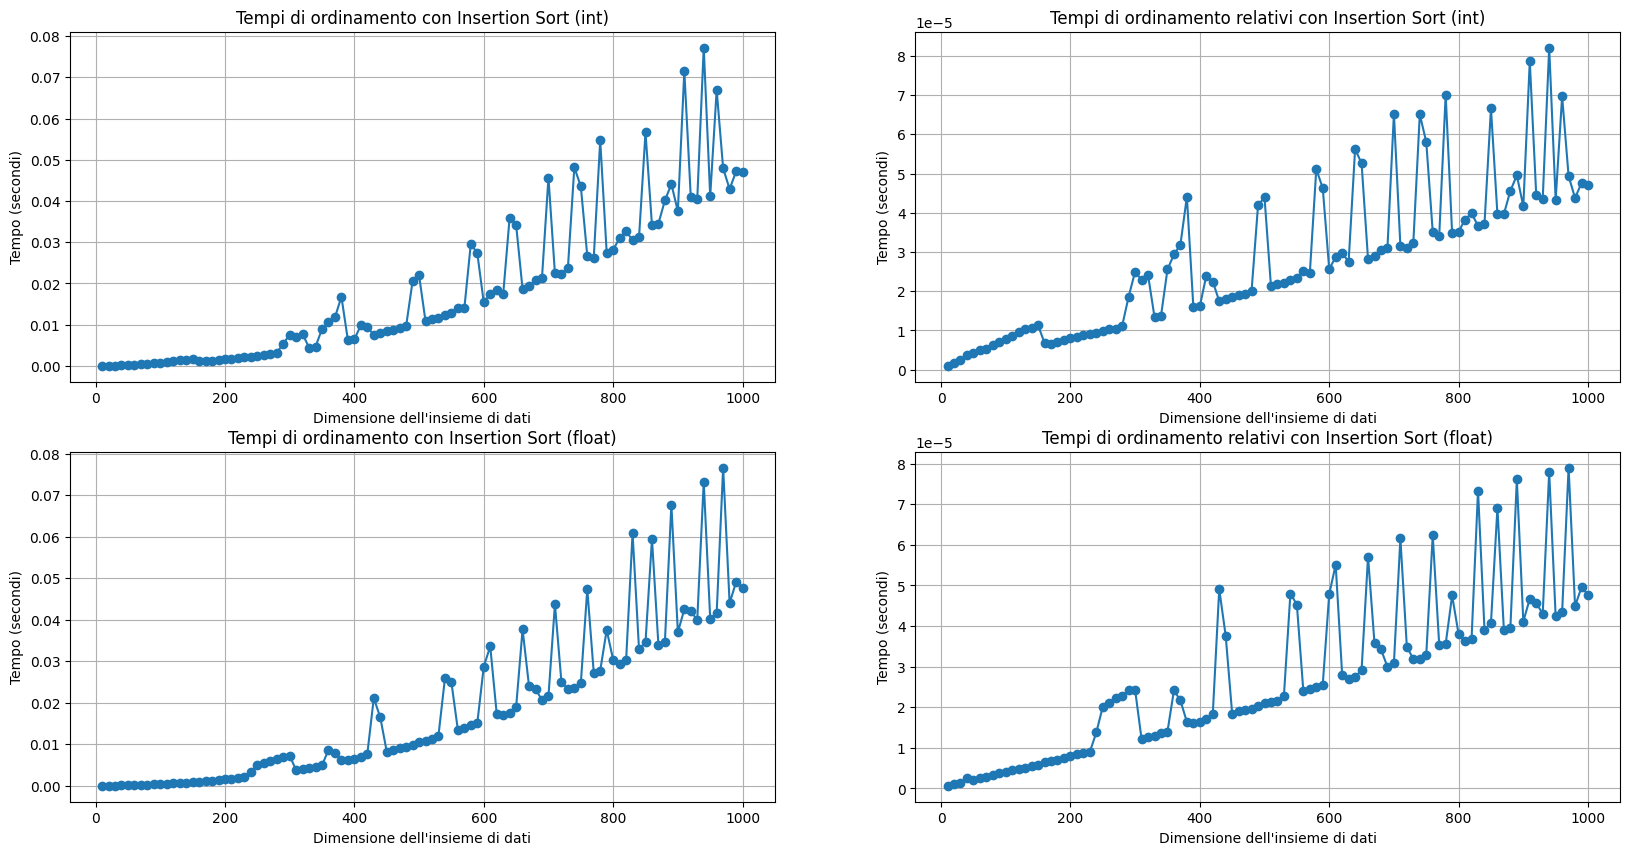

In [6]:
# Valori delle dimensioni ed iterazioni per il singolo test di Insertion Sort
sizes = SIZES
#sizes = [*np.arange(10, 110, 10)]
iterations = ITERATIONS

insertion_sort_times = test_algorithm(insertion_sort, sizes, ITERATIONS)

plot(insertion_sort_times[0], sizes, title="Tempi di ordinamento con Insertion Sort (int)", subplot=1)
plot(insertion_sort_times[0], sizes, title="Tempi di ordinamento relativi con Insertion Sort (int)", subplot=2, relative_times=True)
plot(insertion_sort_times[1], sizes, title="Tempi di ordinamento con Insertion Sort (float)", subplot=3)
plot(insertion_sort_times[1], sizes, title="Tempi di ordinamento relativi con Insertion Sort (float)", subplot=4, relative_times=True)

### 2.2 Analisi

Come possiamo osservare, la complessità di Insertion Sort è facilmente individuabile come almeno un $O(n)$ dai grafici dei tempi relativi. Dall'andamento dei grafici con tempi assoluti intravediamo anche la vera complessità di Insertion Sort, cioè $O(n^2)$.

Le prestazioni non differiscono quasi per niente tra insiemi a dati interi e dati a virgola mobile.

Per l'insieme di dimensioni considerato dal nostro test comune (da 10 a 1000 elementi) abbiamo che questo algoritmo performa in media sui $25\;ms$ circa, con un picco di $70\;ms$ verso i 1000 elementi.

## 3. Merge Sort

Il Merge Sort è un algoritmo di ordinamento basato sulla tecnica "divide et impera". Suddivide la sequenza in due parti, le ordina separatamente e quindi combina le due parti ordinate per produrre una sequenza ordinata completa. L'algoritmo ha una complessità temporale garantita di $O(n \log(n))$, il che lo rende efficiente per grandi insiemi di dati.

**Vantaggi di Merge Sort:**

- **Complessità temporale garantita di $O(n \log(n))$**: la complessità rimane logaritmica rispetto alla dimensione dell'input, infatti il Merge Sort è ideale per insiemi di dati di grandi dimensioni.
- **Ordinamento stabile**: viene mantenuto l'ordine relativo degli elementi con chiavi uguali, rendendolo un ordinamento stabile.

**Svantaggi di Merge Sort:**

- **Complessità di implementazione leggermente più complessa rispetto all'Insertion Sort**: l'implementazione richiede una logica più complessa rispetto a algoritmi come l'Insertion Sort, rendendo la sua comprensione più intricata.

La complessità temporale del Merge Sort è $O(n \log(n))$, che rappresenta il caso peggiore, il caso migliore e il caso medio. Il comportamento asintotico esatto dell'algoritmo è $\Theta(n \log(n))$ in ogni situazione. Questo rende il Merge Sort un algoritmo altamente efficiente per l'ordinamento di grandi insiemi di dati.

In [7]:
# Implementazione di Merge Sort
def merge_sort(arr: list[Any]) -> None:
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)
        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

### 3.1 Test

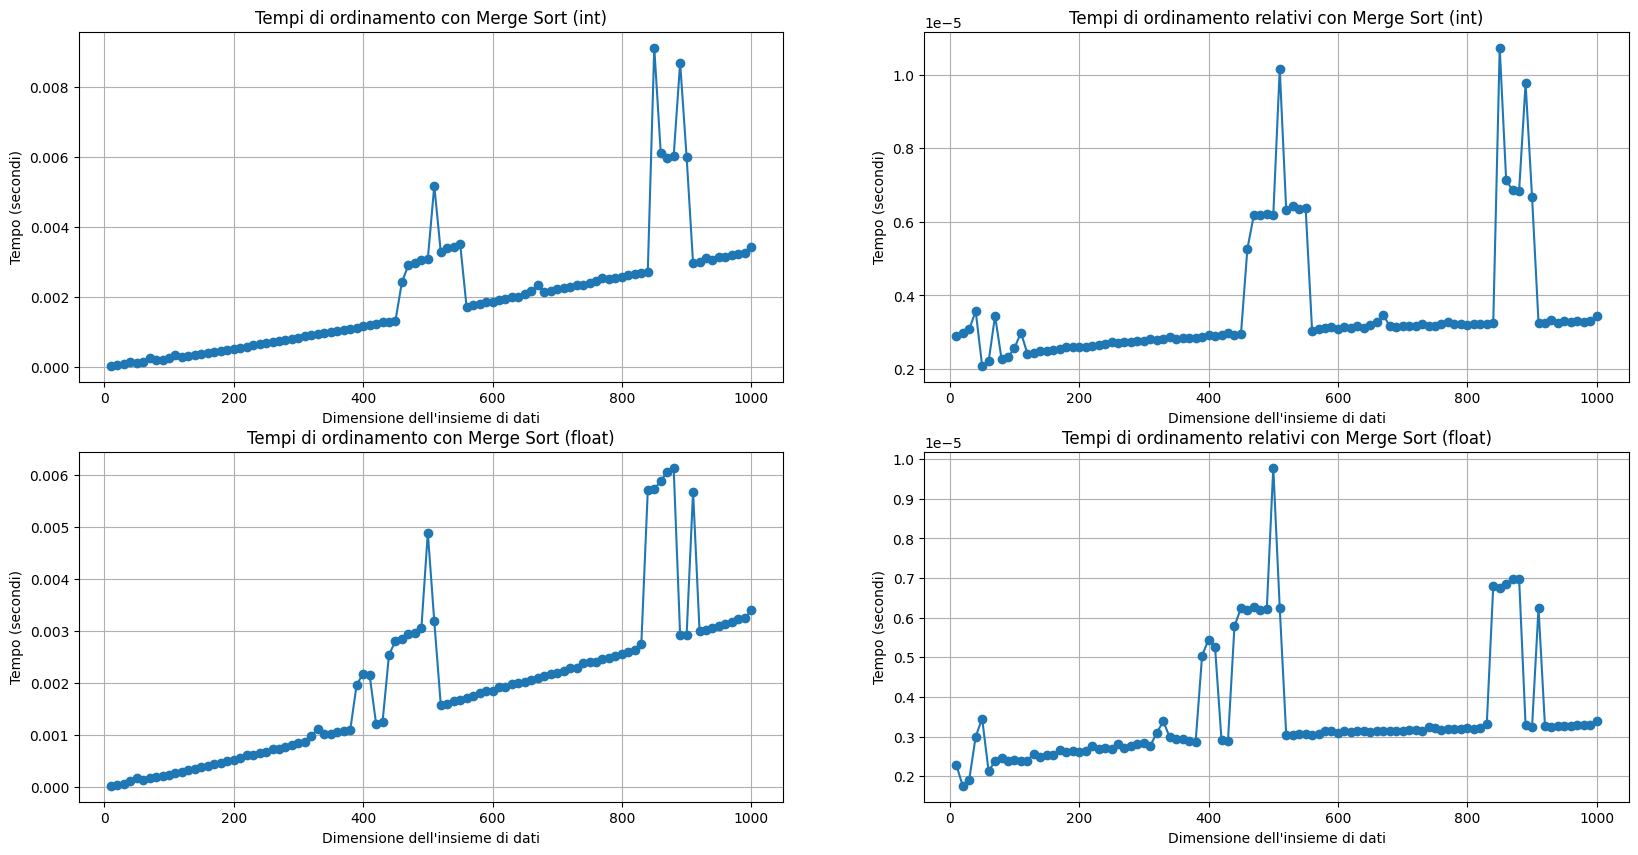

In [8]:
# Valori delle dimensioni ed iterazioni per il singolo test di Merge Sort
sizes = SIZES
#sizes = [*np.arange(100, 1100, 100)]
iterations = ITERATIONS

merge_sort_times = test_algorithm(merge_sort, sizes, ITERATIONS)

plot(merge_sort_times[0], sizes, title="Tempi di ordinamento con Merge Sort (int)", subplot=1)
plot(merge_sort_times[0], sizes, title="Tempi di ordinamento relativi con Merge Sort (int)", subplot=2, relative_times=True)
plot(merge_sort_times[1], sizes, title="Tempi di ordinamento con Merge Sort (float)", subplot=3)
plot(merge_sort_times[1], sizes, title="Tempi di ordinamento relativi con Merge Sort (float)", subplot=4, relative_times=True)

### 3.2 Analisi

La complessità di Merge Sort non è facilmente ricavabile, il suo andamento però è chiaramente osservabile dai grafici dei tempi relativi, i cui valori restano quasi costanti con l'aumentare della dimensione dell'insieme di test; crescono comunque leggeremente dato che dovrebbero essere $O(n \log(n))$.

Anche qui le prestazioni non sono molto diverse tra insiemi a dati interi e dati a virgola mobile.

Per il nostro test comune (insiemi a dimensione da 10 a 1000 elementi) abbiamo che questo algoritmo esegue in media in $2\;ms$ circa, con picchi massimi da $6$ a $8\;ms$ verso i 1000 elementi.

## 3. Conclusione

Come abbiamo osservato dai risultati sperimentali, le complessità computazionali di Insetion e Merge Sort sono direttamente riscontrabili nei loro tempi di esecuzione, portando così alla stessa conclusione della teoria.

**Infatti Merge Sort, negli insiemi da 10 a 1000 elementi, è circa 12 volte più veloce di Insertion Sort in media e circa 9 volte più veloce nel caso peggiore.**

Oltretutto, come già descritto in precedenza, il Merge Sort ci offre anche un ordinamento stabile rispetto all'ordine degli elementi, cosa che Insertion Sort non mantiene.

Insertion Sort può essere usato per insiemi di dimensioni molto piccole (< 100 elementi) dove i tempi di esecuzione sono comunque ridotti e non vogliamo aggiungere ulteriore complessità all'algoritmo di ordinamento usato. In praticamente tutti gli altri casi d'uso è conveniente usare il Merge Sort per la sua complessità nettamente migliore.